In [1]:
import numpy as np
from Core.Field import OpticalField as Field
from Core.Modes import LaguerreGaussMode as Lg
from Core.Modes import HermiteGaussMode as Hg
from Core.Modes import Superposition as Sp
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-.5e-2,.5e-2,1000)
y = np.linspace(-.5e-2,.5e-2,1000)
x,y = np.meshgrid(x,y)

fld = Field(x,y,0)

lg = Lg(1,1,x,y)
hg = Hg(0,4,x,y)

0.9999999999999998


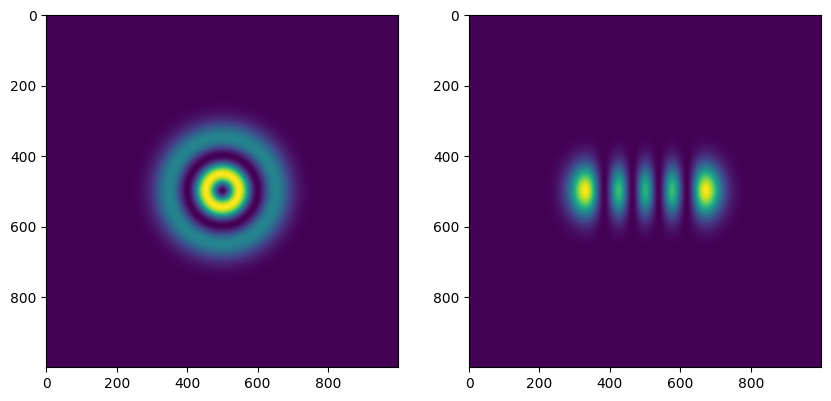

In [3]:
fig,axes = plt.subplots(1,2,figsize=(10, 6))
axes[0].imshow(lg.intensity())
axes[1].imshow(hg.intensity())
print(np.sum(lg.intensity()))

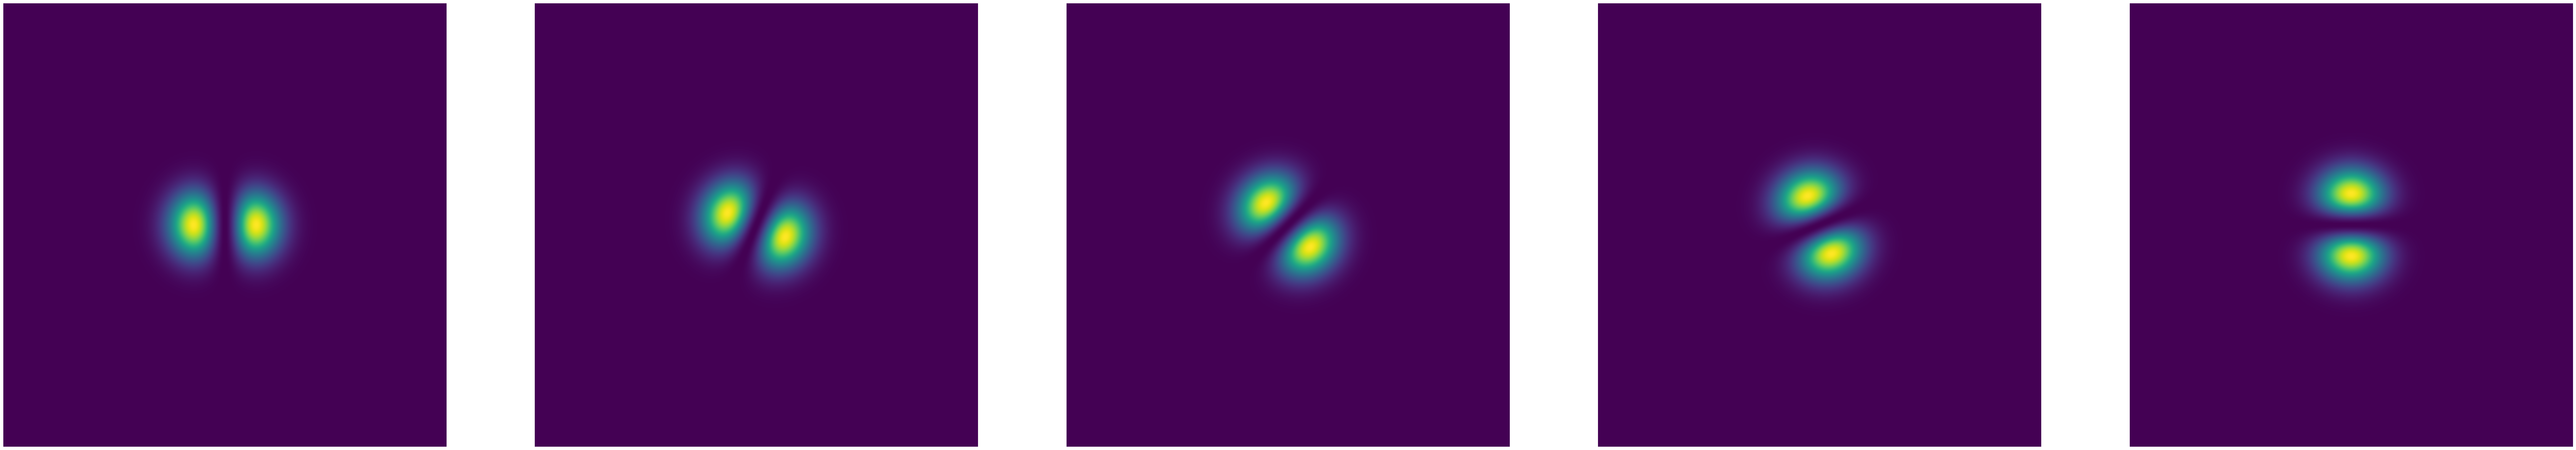

In [10]:
hg1 = Hg(0,1,x,y)
hg2 = Hg(1,0,x,y)
fig,axes = plt.subplots(1,5,figsize=(100, 40))

for i,a in zip(range(5),np.linspace(0,np.pi/2,5)):
    field = np.cos(a)*hg1.E+np.sin(a)*hg2.E
    
    superposition = Field(x,y,0,E=field)

    #axes[i//5,i%5].imshow(superposition.intensity())
    #axes[i//5,i%5].set_axis_off()
    axes[i].imshow(superposition.intensity())
    axes[i].set_axis_off()

In [11]:
fld3 = Field(x,y,0)
lg = Lg(0,1,x,y,z=100,w0=0.001)
hg = Lg(0,0,x,y,z=0,w0=.04)

fld3.E = lg.E+hg.E

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

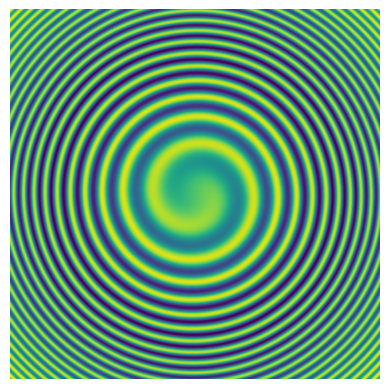

In [12]:
fld3 = Field(x,y,0)

lg = Hg(0,0,x,y,z=2,w0=0.000080)
hg = Lg(0,1,x,y,z=0,w0=10)

fld3.E = lg.E+hg.E

plt.imshow(fld3.intensity())
plt.axis('off')

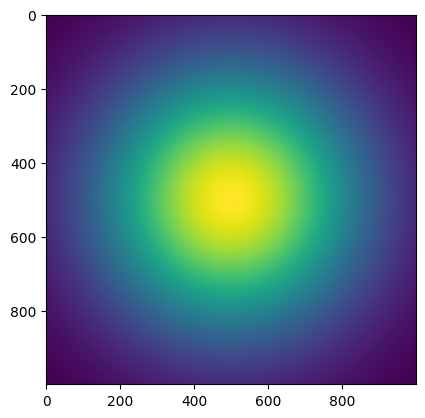

In [13]:
# problema: é possivel quebrar facilmente colocando números grandes (500000 modos, coeficientes enormes)
# lidar com isso, ou deixe que quem usa lide???????
mode1 = dict(type='hg',m=0,n=0,w0=0.000080,z=2)
mode2 = dict(type='lg',l=1,p=0,w0=10)
modes = [mode1,mode2]
sp = Sp(modes,x,y)
plt.imshow(sp.intensity())

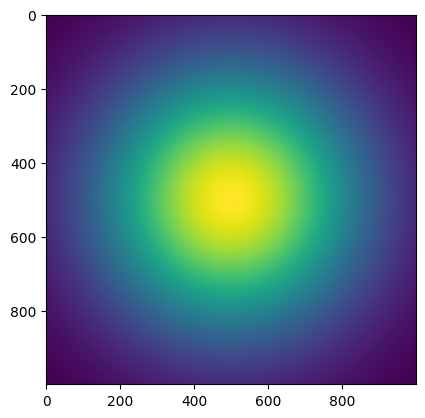

In [8]:
plt.imshow(sp.intensity())